In [187]:
# Import pandas and numpy

import numpy as np 
import pandas as pd

# Import matplotlib and seaborn for plotting and to specify that graphs should be plotted inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier



In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
bank = pd.read_csv("bank-full.csv", sep=";", na_values=["NA", ""])

In [189]:
# Output the modified dataset
print(bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [190]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [191]:
bank["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

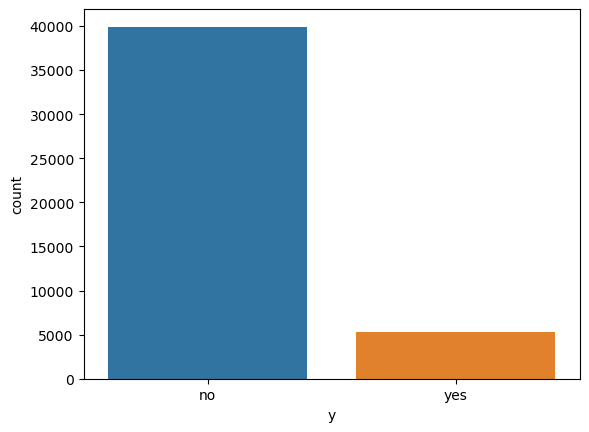

In [192]:
import seaborn as sns
sns.countplot(data=bank,x=bank['y'])

<Axes: xlabel='poutcome'>

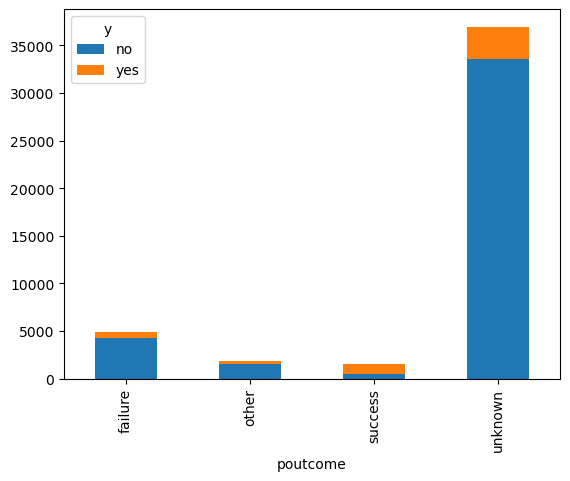

In [193]:
types = bank.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [194]:
bank["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [195]:
bank["previous"].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

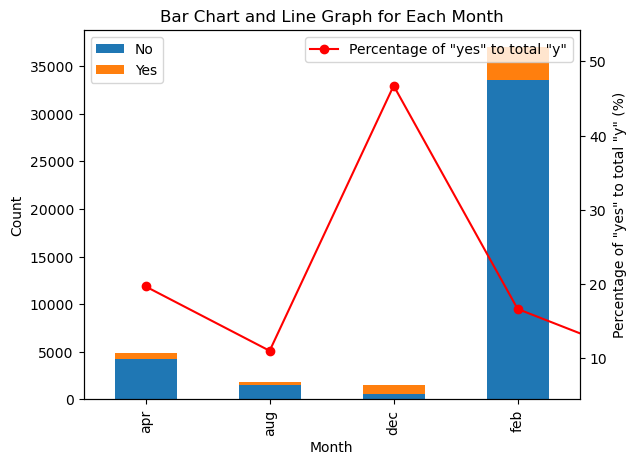

In [196]:
import matplotlib.pyplot as plt

# Group by month and calculate counts of 'y' values
y_counts = bank.groupby("month")['y'].value_counts(normalize=False).unstack()

# Calculate percentage of 'yes' values to total 'y' values for each month
percentage_yes = (y_counts['yes'] / (y_counts['yes'] + y_counts['no'])) * 100

# Plot the bar chart
ax = types.plot(kind='bar', stacked=True)

# Plot the line graph for percentage of 'yes' values
ax2 = ax.twinx()  # Create a secondary y-axis
percentage_yes.plot(ax=ax2, color='red', marker='o', linestyle='-')

# Set labels and title for both axes
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax2.set_ylabel('Percentage of "yes" to total "y" (%)')

# Set title for the plot
plt.title('Bar Chart and Line Graph for Each Month')

# Show legend for both axes
ax.legend(['No', 'Yes'], loc='upper left')
ax2.legend(['Percentage of "yes" to total "y"'], loc='upper right')

# Show plot
plt.show()


<Axes: xlabel='contact'>

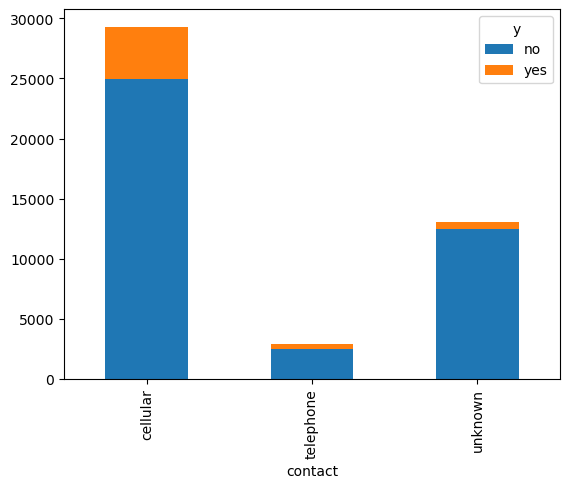

In [197]:
# group by contact to display bar chart
types = bank.groupby("contact")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='marital'>

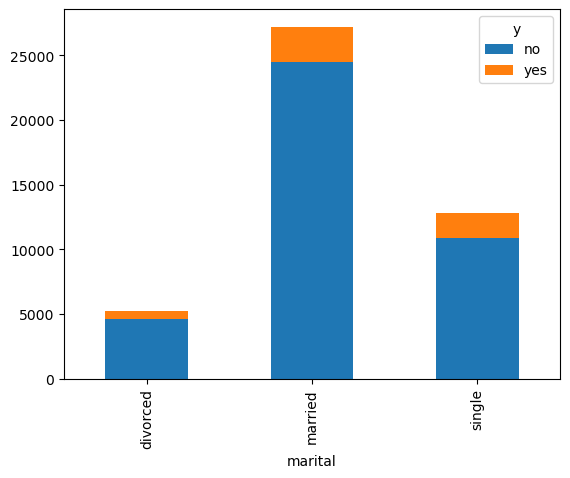

In [198]:
# group by marital to display bar chart
types = bank.groupby("marital")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='housing'>

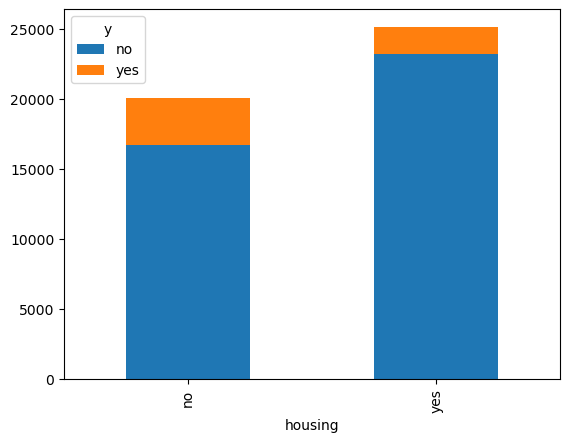

In [199]:
# group by housing to display bar chart
types = bank.groupby("housing")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='default'>

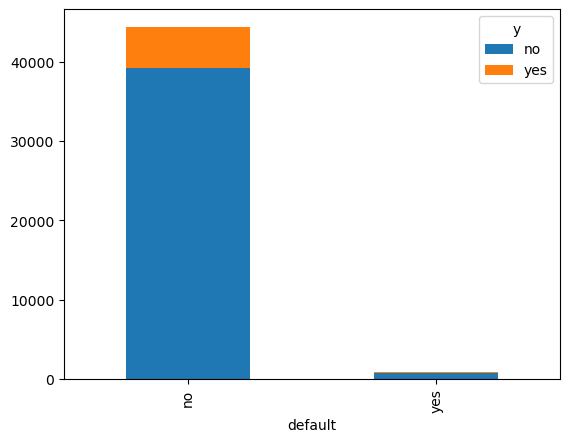

In [200]:
# group by default to display bar chart
types = bank.groupby("default")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='job'>

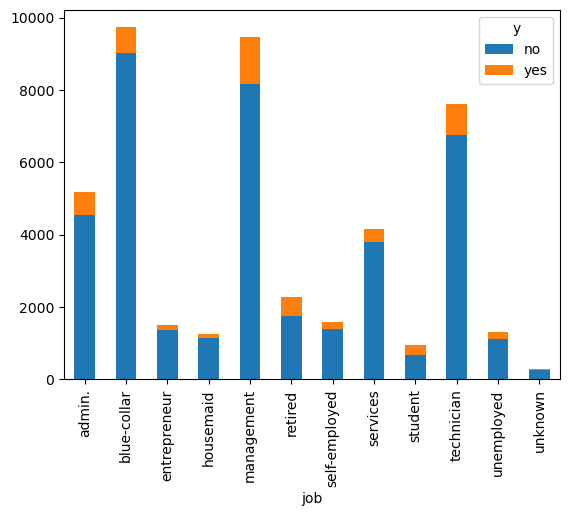

In [201]:
# group by job to display bar chart
types = bank.groupby("job")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='education'>

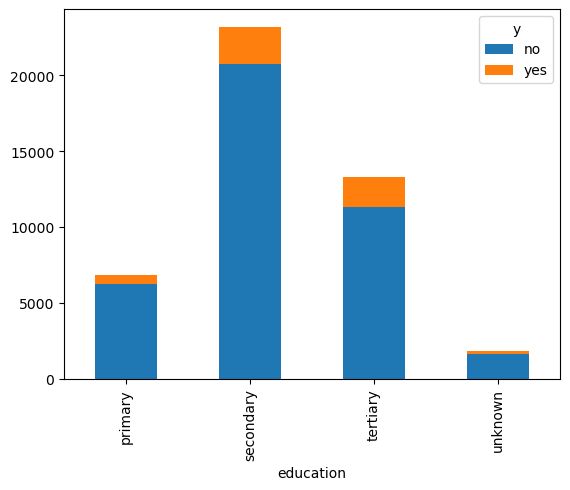

In [202]:
types = bank.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

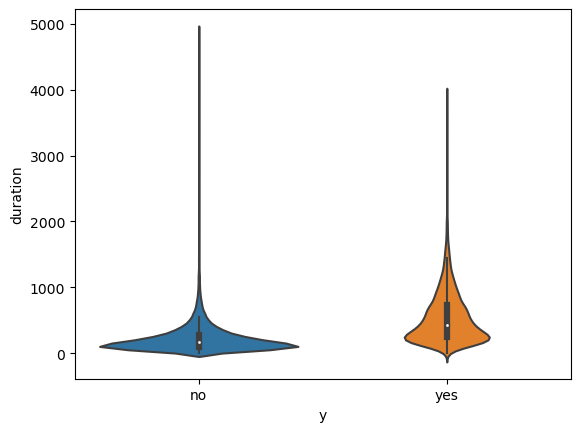

In [203]:
#violin plot for duration
sns.violinplot(x="y", y="duration", data=bank, size=8)
plt.show()

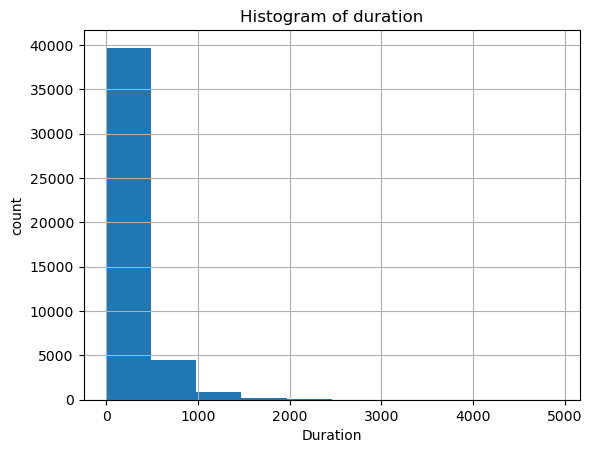

In [204]:
#Histogram of duration
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

In [205]:
# Checking for duplicates
dup_vector = bank[bank.duplicated()]

# Convert the target variable to binary
bank['y'] = (bank['y'] == "yes").astype(int)
bank['y'] = bank['y'].astype('category')


# Define job groups
job_groups = {
    'management_entrepreneur': ["management", "entrepreneur", "self-employed"],
    'technical_service': ["technician", "admin.", "services"],
    'low_pay': ["blue-collar", "housemaid"],
    'unknown': ["unknown","unemployed"],
    'retired': ["retired"],
    'student': ["student"]
}

bins = [17, 24, 59, 98]  # Adjusted boundaries for age ranges, excluding below 18
labels = ['Young Adult', 'Adult', 'Senior Citizen'] 



# Categorize the ages
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels, right=False)


# One-hot encoding for age_group column
encoded_age = pd.get_dummies(bank['age_group'], prefix='age_group')
encoded_age = encoded_age.astype(int)
bank = pd.concat([bank, encoded_age], axis=1)


# Create a new column for job groups and assign groups
bank['job_group'] = bank['job'].apply(lambda x: next((k for k, v in job_groups.items() if x in v), None))

# One-hot encoding for job_group column
encoded_jobs = pd.get_dummies(bank['job_group'], prefix='job_group')
encoded_jobs = encoded_jobs.astype(int)
bank = pd.concat([bank, encoded_jobs], axis=1)

# One-hot encoding for job_group column
#encoded_month = pd.get_dummies(bank['month'], prefix='month')
#encoded_month = encoded_month.astype(int)
#bank = pd.concat([bank, encoded_month], axis=1)

# One-hot encoding for job_group column
encoded_contact = pd.get_dummies(bank['contact'], prefix='contact')
encoded_contact = encoded_contact.astype(int)
bank = pd.concat([bank, encoded_contact], axis=1)

# One-hot encoding for marital column
encoded_marital = pd.get_dummies(bank['marital'], prefix='marital')
encoded_marital = encoded_marital.astype(int)
bank = pd.concat([bank, encoded_marital], axis=1)

# One-hot encoding for education column
encoded_education = pd.get_dummies(bank['education'], prefix='education')
encoded_education = encoded_education.astype(int)
bank = pd.concat([bank, encoded_education], axis=1)

# Convert default, housing, and loan columns to binary
bank['default'] = (bank['default'] == "yes").astype(int)
bank['default'] = bank['default'].astype('category')
bank['housing_loan'] = (bank['housing'] == "yes").astype(int)
bank['housing_loan'] = bank['housing_loan'].astype('category')
bank['personal_loan'] = (bank['loan'] == "yes").astype(int)
bank['housing_loan'] = (bank['housing'] == "yes").astype(int)
bank['housing_loan'] = bank['housing_loan'].astype('category')


# One-hot encoding for poutcome column
encoded_poutcome = pd.get_dummies(bank['poutcome'], prefix='poutcome')
encoded_poutcome = encoded_poutcome.astype(int)
bank = pd.concat([bank, encoded_poutcome], axis=1)





In [206]:
bank.previous

0         0
1         0
2         0
3         0
4         0
         ..
45206     0
45207     0
45208     3
45209     0
45210    11
Name: previous, Length: 45211, dtype: int64

In [207]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   age                                45211 non-null  int64   
 1   job                                45211 non-null  object  
 2   marital                            45211 non-null  object  
 3   education                          45211 non-null  object  
 4   default                            45211 non-null  category
 5   balance                            45211 non-null  int64   
 6   housing                            45211 non-null  object  
 7   loan                               45211 non-null  object  
 8   contact                            45211 non-null  object  
 9   day                                45211 non-null  int64   
 10  month                              45211 non-null  object  
 11  duration                           45211 

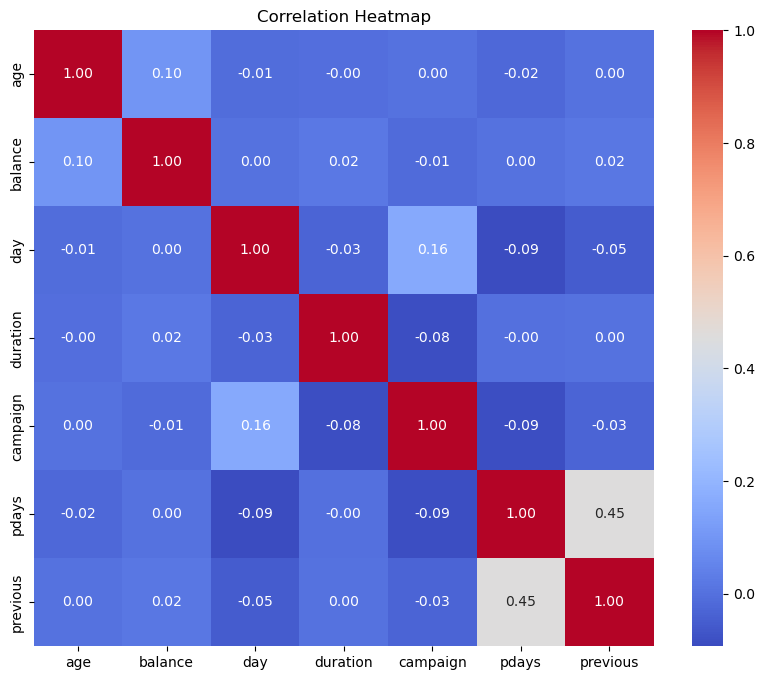

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = bank.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [209]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Drop unnecessary columns
#bank = bank.drop(columns=['job', 'marital', 'education', 'job_group',
 #                        'job_group_unknown','education_unknown','contact_unknown','age_group', 'duration', 'contact', 'month', 'poutcome','housing','loan'])

# Calculate correlation between 'y' and all other variables
#corr_with_y = bank.corr()['y'].drop('y')

# Sort correlations in descending order
#corr_with_y_sorted = corr_with_y.sort_values(ascending=False)

# Plot correlations
#plt.figure(figsize=(10, 6))
#corr_with_y_sorted.plot(kind='bar', color='skyblue')
#plt.xlabel("Features", fontsize=15)
#plt.ylabel("Correlation with 'Deposit'", fontsize=15)
#plt.title("Correlation between Features and Target Variable 'Deposit'", fontsize=15)
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()


In [210]:
# Drop unnecessary columns
bank = bank.drop(columns=['job', 'marital', 'education', 'job_group','loan','housing','contact','poutcome', 'default','contact_cellular','contact_telephone',
                         'job_group_unknown','education_unknown','contact_unknown','age_group', 'age', 'pdays','previous', 'duration', 'day','month', 'poutcome_failure',
                         'poutcome_other','poutcome_success','poutcome_unknown','personal_loan'])


In [211]:
bank = bank[[col for col in bank.columns if col != 'y'] + ['y']]

In [212]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   balance                            45211 non-null  int64   
 1   campaign                           45211 non-null  int64   
 2   age_group_Young Adult              45211 non-null  int32   
 3   age_group_Adult                    45211 non-null  int32   
 4   age_group_Senior Citizen           45211 non-null  int32   
 5   job_group_low_pay                  45211 non-null  int32   
 6   job_group_management_entrepreneur  45211 non-null  int32   
 7   job_group_retired                  45211 non-null  int32   
 8   job_group_student                  45211 non-null  int32   
 9   job_group_technical_service        45211 non-null  int32   
 10  marital_divorced                   45211 non-null  int32   
 11  marital_married                    45211 

In [213]:
bank.columns.tolist()

['balance',
 'campaign',
 'age_group_Young Adult',
 'age_group_Adult',
 'age_group_Senior Citizen',
 'job_group_low_pay',
 'job_group_management_entrepreneur',
 'job_group_retired',
 'job_group_student',
 'job_group_technical_service',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'housing_loan',
 'y']

In [214]:
bank.head()

,balance,campaign,age_group_Young Adult,age_group_Adult,age_group_Senior Citizen,job_group_low_pay,job_group_management_entrepreneur,job_group_retired,job_group_student,job_group_technical_service,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,housing_loan,y
0,2143,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
1,29,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,2,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
3,1506,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


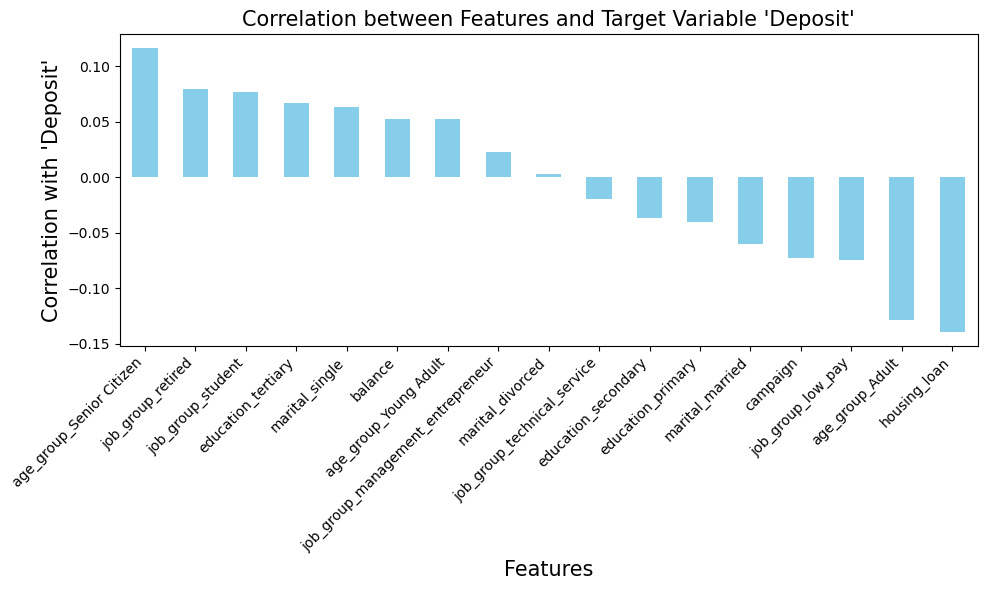

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlation between 'y' and all other variables
corr_with_y = bank.corr()['y'].drop('y')

# Sort correlations in descending order
corr_with_y_sorted = corr_with_y.sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 6))
corr_with_y_sorted.plot(kind='bar', color='skyblue')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation with 'Deposit'", fontsize=15)
plt.title("Correlation between Features and Target Variable 'Deposit'", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
    

In [216]:
from sklearn.preprocessing import StandardScaler

# Make a copy of the original dataframe
bank_scaled = bank.copy()

# Define columns to be scaled
scaled_cols = [ 'balance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
bank_scaled[scaled_cols] = scaler.fit_transform(bank_scaled[scaled_cols])

# Display the first 10 rows of the scaled dataframe
print(bank_scaled.head(10))


    balance  campaign  age_group_Young Adult  age_group_Adult  \
0  0.256419         1                      0                1   
1 -0.437895         1                      0                1   
2 -0.446762         1                      0                1   
3  0.047205         1                      0                1   
4 -0.447091         1                      0                1   
5 -0.371551         1                      0                1   
6 -0.300608         1                      0                1   
7 -0.446762         1                      0                1   
8 -0.407679         1                      0                1   
9 -0.252657         1                      0                1   

   age_group_Senior Citizen  job_group_low_pay  \
0                         0                  0   
1                         0                  0   
2                         0                  0   
3                         0                  1   
4                         0       

In [217]:
from sklearn.model_selection import train_test_split
# Set target variable
y=bank_scaled['y']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(bank_scaled)
x_data=bank_scaled.drop(['y'], axis = 1)

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# verify the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (31647, 17)
Shape of y_train : (31647,)
Shape of x_test : (13564, 17)
Shape of y_test : (13564,)


In [218]:
from imblearn.over_sampling import RandomOverSampler
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled train data
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)
print("Shape of x_train_resampled:", x_train_resampled.shape)

Shape of resampled dataset: (55906, 17) (55906,)
Shape of x_train_resampled: (55906, 17)


In [219]:
# Convert x_train_resampled to CSV
#x_train_resampled.to_csv('x_train.csv', index=False)

# Convert y_train_resampled to CSV
#y_train_resampled.to_csv('y_train.csv', index=False)

# Convert x_test to CSV
#x_test.to_csv('x_test.csv', index=False)

# Convert y_test to CSV
#y_test.to_csv('y_test.csv', index=False)


In [220]:
# Logistic Regression
# Define function
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_logreg=logreg.predict(x_test)
pred_prob = logreg.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))

Accuracy of logistic regression classifier on train set:  0.6399849747790934
Accuracy of logistic regression classifier on test set:  0.6487761722205839
AUC for logistic regression: 0.6851961611383219


In [221]:
coefficients = logreg.coef_[0]

# Create a DataFrame to display coefficients and standard errors
import pandas as pd
coefficients_df = pd.DataFrame({'Coefficient': coefficients}, index=x_train_resampled.columns)
print(coefficients_df)

                                   Coefficient
balance                               0.114912
campaign                             -0.116700
age_group_Young Adult                 0.305397
age_group_Adult                      -0.234620
age_group_Senior Citizen              0.692388
job_group_low_pay                    -0.493029
job_group_management_entrepreneur    -0.399835
job_group_retired                    -0.243069
job_group_student                     0.183537
job_group_technical_service          -0.338691
marital_divorced                      0.252154
marital_married                       0.058142
marital_single                        0.452868
education_primary                    -0.154612
education_secondary                   0.043373
education_tertiary                    0.347550
housing_loan                         -0.689331


In [222]:
exp_coeffs = np.exp(logreg.coef_)

# Get the column names of the DataFrame used for training
feature_names = bank.columns

# Print the variable names along with the exponentiated coefficients
for coef, feature_name in zip(exp_coeffs[0], feature_names):
    print(f"{feature_name}: {coef}")
    

balance: 1.1217749511686803
campaign: 0.8898525369063385
age_group_Young Adult: 1.3571634575567946
age_group_Adult: 0.7908711752720923
age_group_Senior Citizen: 1.9984817835152053
job_group_low_pay: 0.6107737262288836
job_group_management_entrepreneur: 0.6704307219512959
job_group_retired: 0.7842175437088269
job_group_student: 1.201459590984397
job_group_technical_service: 0.7127029149786854
marital_divorced: 1.2867946453399255
marital_married: 1.0598653354240781
marital_single: 1.572816894440681
education_primary: 0.8567478051163
education_secondary: 1.0443275016313354
education_tertiary: 1.4155952664277838
housing_loan: 0.5019115927033755


In [223]:
import numpy as np
from scipy.stats import norm

# Assuming you have already trained a logistic regression model named logreg and have x_train_resampled data
# Get coefficients and features
coefficients = logreg.coef_[0]
features = x_train_resampled.columns

# Convert x_train_resampled to float64 data type
x_train_resampled = x_train_resampled.astype('float64')

# Calculate standard errors (assuming large sample size)
# You can also consider bootstrapping for more accurate standard errors
std_errors = np.sqrt(np.diag(np.linalg.inv(np.dot(x_train_resampled.T, x_train_resampled))))

# Calculate z-values
z_values = coefficients / std_errors

# Calculate probabilities
probabilities = 2 * (1 - norm.cdf(np.abs(z_values)))  # Two-tailed test

# Create a DataFrame to display coefficients, standard errors, z-values, and probabilities
coefficients_df = pd.DataFrame({'Coefficient': coefficients,
                                'Standard Error': std_errors,
                                'Z-value': z_values,
                                'Probability': probabilities},
                               index=features)

# Print the DataFrame
print(coefficients_df)


                                   Coefficient  Standard Error    Z-value  \
balance                               0.114912        0.003809  30.172269   
campaign                             -0.116700        0.001603 -72.778336   
age_group_Young Adult                 0.305397             NaN        NaN   
age_group_Adult                      -0.234620             NaN        NaN   
age_group_Senior Citizen              0.692388             NaN        NaN   
job_group_low_pay                    -0.493029        0.023284 -21.174827   
job_group_management_entrepreneur    -0.399835        0.023166 -17.259382   
job_group_retired                    -0.243069        0.029610  -8.208981   
job_group_student                     0.183537        0.033735   5.440627   
job_group_technical_service          -0.338691        0.022218 -15.243847   
marital_divorced                      0.252154             NaN        NaN   
marital_married                       0.058142             NaN        NaN   

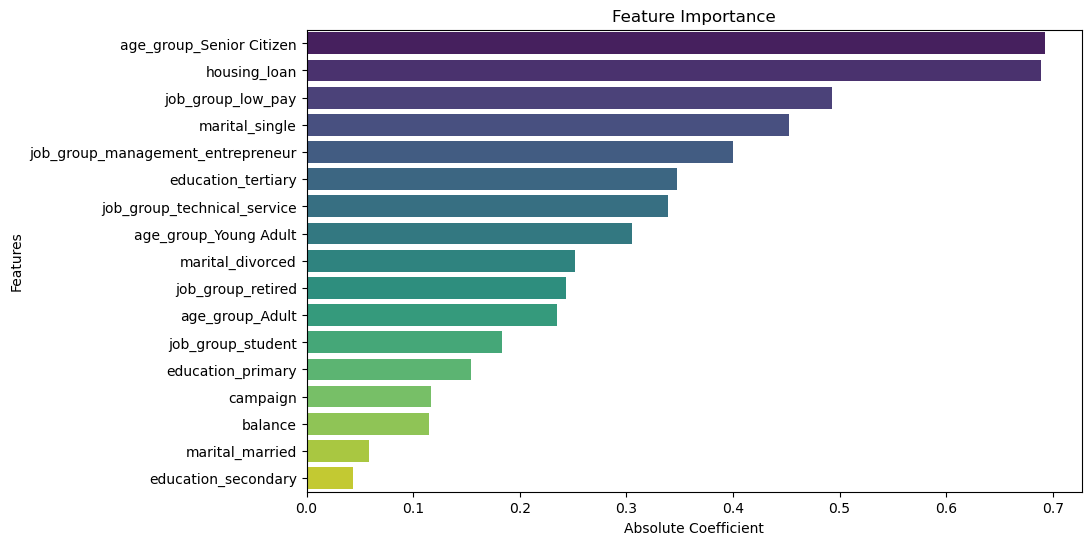

In [224]:
# Sort coefficients by descending absolute coefficient values
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_df['Coefficient'].abs(), y=coefficients_df.index, orient='h', palette='viridis', order=coefficients_df.index)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.show()

In [225]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])

TP is: 1004
TN is: 7796
FP is: 4173
FN is: 591


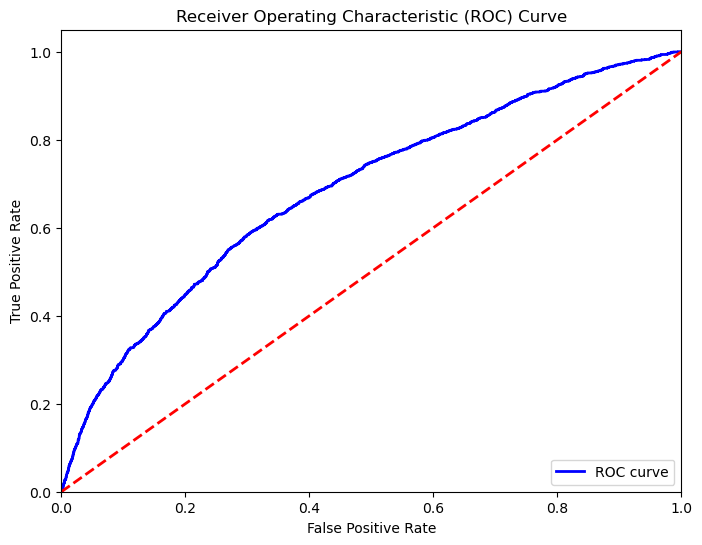

In [226]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [227]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params)

# Train classifier
grid_tree.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test)
pred_prob = grid_tree.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of Decision Tree classifier on train set: ', grid_tree.score(x_train_resampled,y_train_resampled))
print('Accuracy of Decision Tree classifier on test set: ', grid_tree.score(x_test, y_test))
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)

Accuracy of Decision Tree classifier on train set:  0.6317568776159983
Accuracy of Decision Tree classifier on test set:  0.7634915953995871
AUC for Decision Tree: 0.6612674173170974
Accuracy: 0.6316674390663659
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


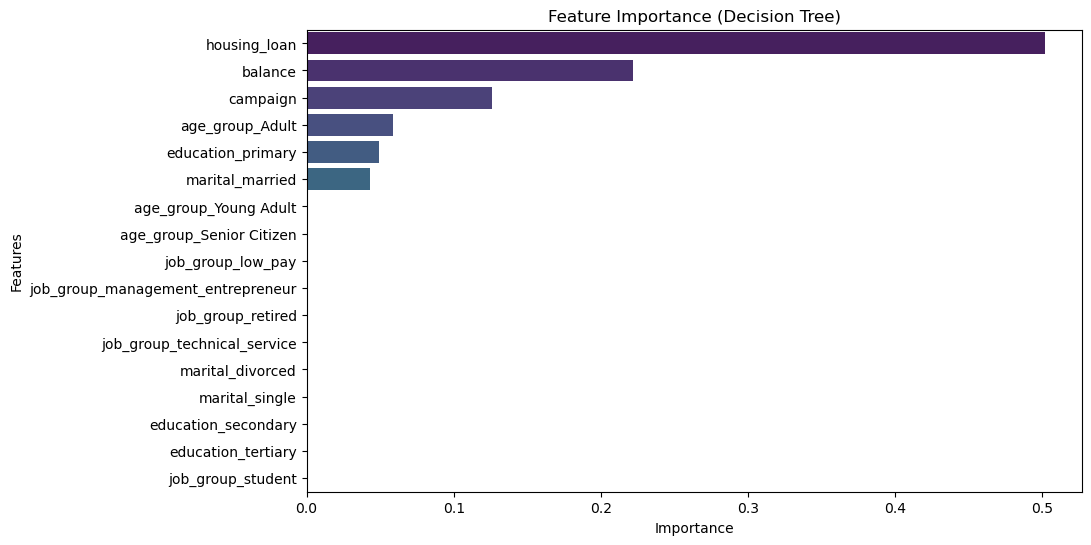

In [228]:
# Extract feature importances
feature_importance = grid_tree.best_estimator_.feature_importances_

# Create DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x_train_resampled.columns, 'Importance': feature_importance})

# Sort DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h', palette='viridis')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

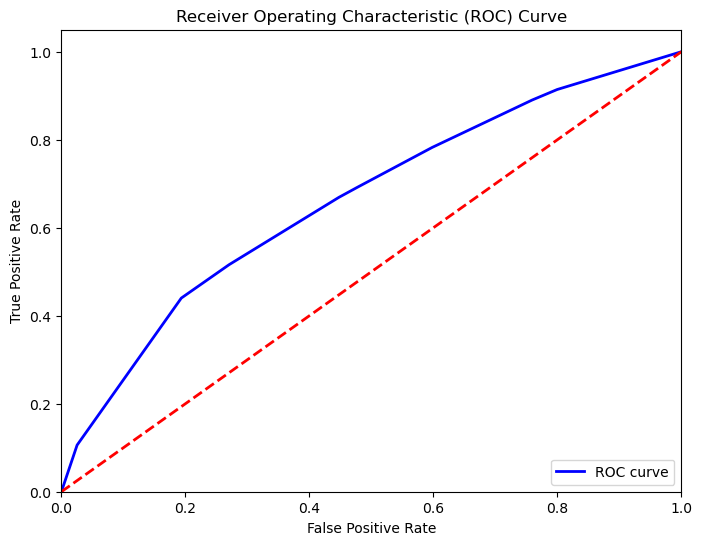

In [229]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [230]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])

TP is: 702
TN is: 9654
FP is: 2315
FN is: 893


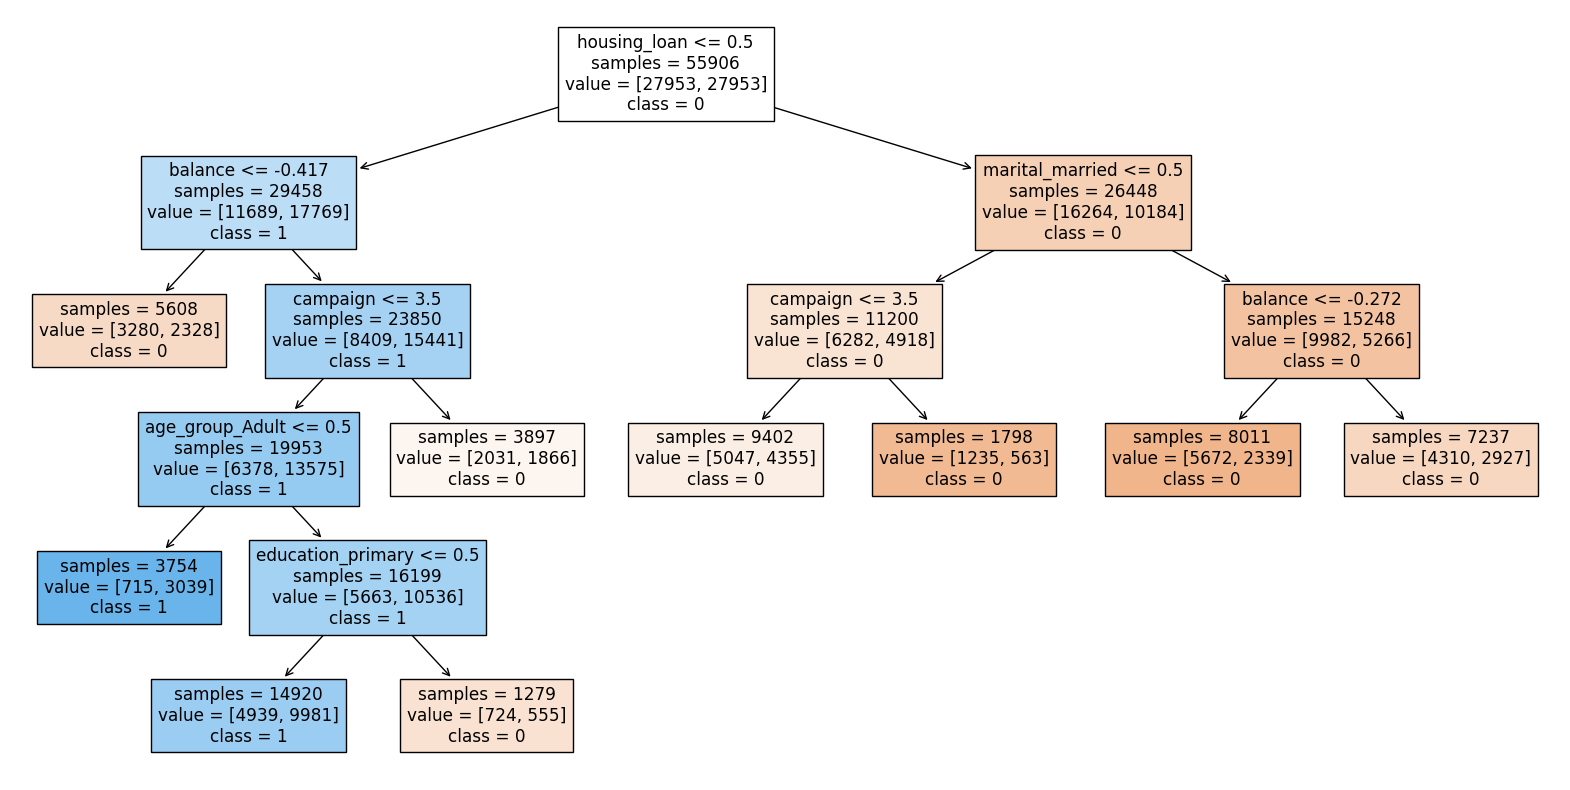

In [231]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = bank_scaled['y'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = bank.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()

In [232]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train_resampled, y_train_resampled)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test)
print('Accuracy of random forest classifier on train set: ', grid_rf_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of random forest classifier on test set: ', grid_rf_tree.score(x_test, y_test))
pred_prob = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob))

Accuracy of random forest classifier on train set:  0.7747064720764136
Accuracy of random forest classifier on test set:  0.6971025986410557
AUC for random forest classifier: 0.6971025986410557


In [233]:
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])

TP is: 946
TN is: 8418
FP is: 3551
FN is: 649


In [235]:
# Adaboost Ensemble Classifier 

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train_resampled, y_train_resampled)


y_pred_ada=grid_ada_tree.predict(x_test)
pred_prob5 = grid_ada_tree.predict_proba(x_test)[:,1]




# Print train, test accuracy and area under the curve score

print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test, y_test))
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob5))
print("Best learning rate:", grid_ada_tree.best_params_)



Accuracy of adaboost classifier on train set:  0.6526312023754158
Accuracy of adaboost classifier on test set:  0.6604983780595695
AUC for Adaboost: 0.6966818932189243
Best learning rate: {'learning_rate': 1.0}


In [236]:
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])



TP is: 990
TN is: 7969
FP is: 4000
FN is: 605


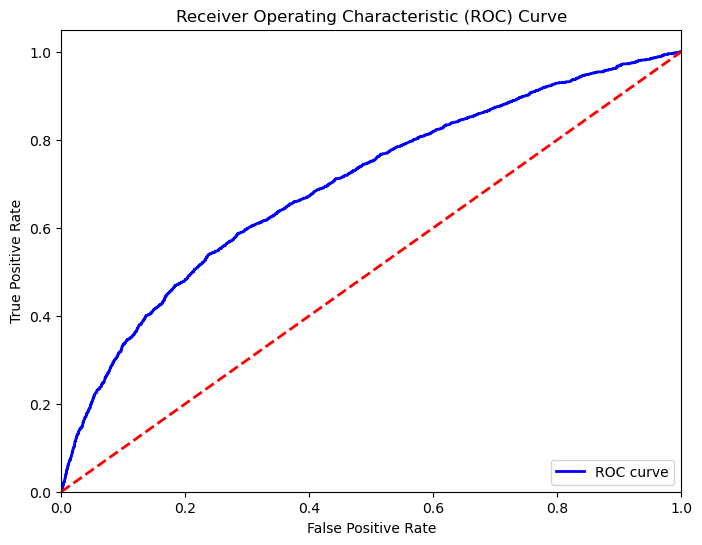

In [237]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob5)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [239]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200,100,50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_mlp = mlp.predict(x_test)
pred_prob6 = mlp.predict_proba(x_test)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_score = roc_auc_score(y_test, pred_prob6)

# Print 
print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




Test Accuracy: 0.7258183426717782
AUC for nn: 0.6171310367875633


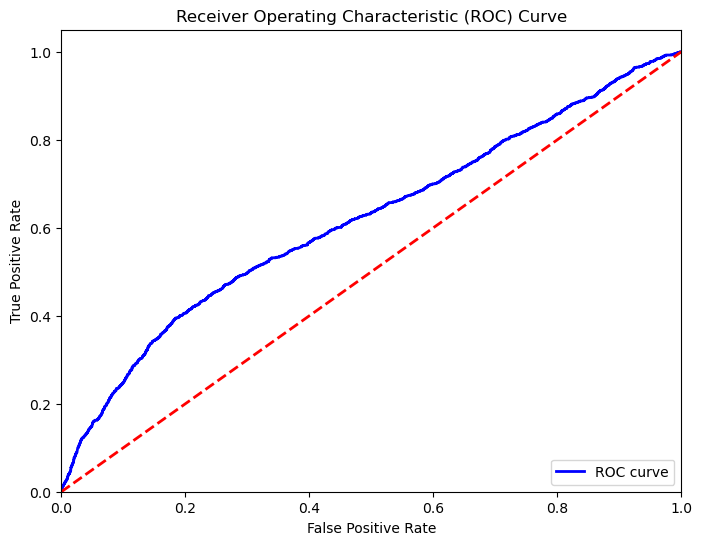

In [240]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, pred_prob6)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [241]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)




Confusion Matrix:
TP: 706
TN: 9139
FP: 2830
FN: 889
